In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
## importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
df = pd.read_csv("possum.csv")
df.shape

(104, 14)

In [56]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [57]:
## null check
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [58]:
df.dropna(inplace=True)
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [60]:
## function to get numerical and categorical features
def cat_num_feature_selector(dataframe):
    cat_features = [feature for feature in dataframe.columns if df[feature].dtype=='O']
    num_features = [feature for feature in dataframe.columns if df[feature].dtype!='O']
    return cat_features, num_features

In [61]:
cat, num = cat_num_feature_selector(df)

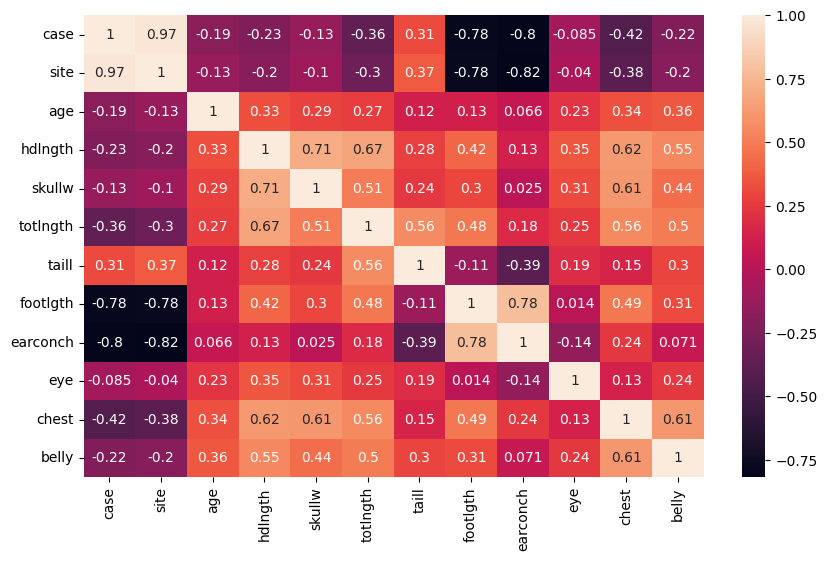

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num].corr(), annot=True)
plt.show()

In [63]:
corr_metrix = df[num].corr()
corr_metrix

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.972590,-0.192688,-0.227342,-0.134138,-0.361924,0.313060,-0.784031,-0.798400,-0.084774,-0.422289,-0.224667
site,0.972590,1.000000,-0.127688,-0.195820,-0.103363,-0.304642,0.372065,-0.781489,-0.818580,-0.040443,-0.380269,-0.195044
age,-0.192688,-0.127688,1.000000,0.329505,0.285563,0.268297,0.120205,0.126190,0.066234,0.231857,0.335030,0.360816
hdlngth,-0.227342,-0.195820,0.329505,1.000000,0.705901,0.670402,0.275155,0.415945,0.131576,0.354688,0.621068,0.545438
skullw,-0.134138,-0.103363,0.285563,0.705901,1.000000,0.506382,0.241027,0.297197,0.025293,0.314319,0.613842,0.444216
totlngth,-0.361924,-0.304642,0.268297,0.670402,0.506382,1.000000,0.563586,0.483174,0.181230,0.247150,0.556094,0.500558
taill,0.313060,0.372065,0.120205,0.275155,0.241027,0.563586,1.000000,-0.114560,-0.387871,0.192341,0.152924,0.296206
footlgth,-0.784031,-0.781489,0.126190,0.415945,0.297197,0.483174,-0.114560,1.000000,0.782415,0.013869,0.486477,0.311970
earconch,-0.798400,-0.818580,0.066234,0.131576,0.025293,0.181230,-0.387871,0.782415,1.000000,-0.143869,0.241359,0.071309
eye,-0.084774,-0.040443,0.231857,0.354688,0.314319,0.247150,0.192341,0.013869,-0.143869,1.000000,0.134730,0.242902


In [64]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

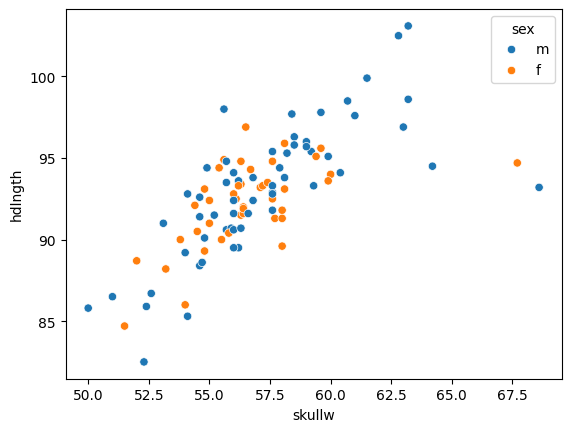

In [65]:
sns.scatterplot(data=df, x='skullw', y='hdlngth', hue='sex')
plt.show()

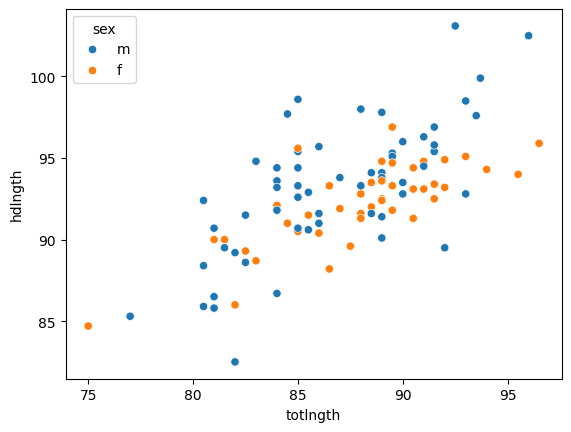

In [66]:
sns.scatterplot(data=df, x='totlngth', y='hdlngth', hue='sex')
plt.show()

In [67]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

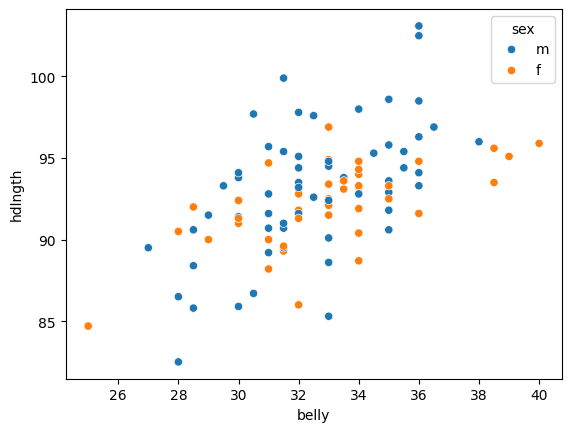

In [68]:
sns.scatterplot(data=df, x='belly', y='hdlngth', hue='sex')
plt.show()

In [69]:
# split the data into training and for test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='hdlngth'),
                                    df['hdlngth'],
                                    test_size=0.25,
                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 13), (26, 13), (75,), (26,))

In [70]:
cat, num = cat_num_feature_selector(X_train)

In [71]:
## ohehotencoing on categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [72]:
transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
],  remainder='passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform((X_test))

In [73]:
## random forest regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model = RandomForestRegressor()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

In [74]:
# check the model performance
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
mse = mean_squared_error(y_test, y_pred)
rmse = (mse)**0.5
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

MSE: 3.29641834615381
RMSE: 1.815604127048022
R2 score: 0.7180009817668289


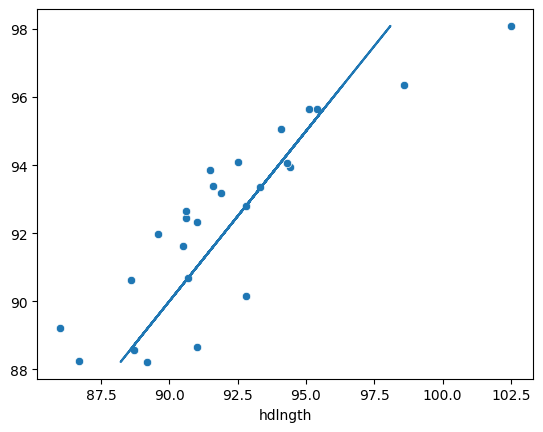

In [76]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_pred, model.predict(X_test_transformed))
plt.show()

In [77]:
## random forest regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

In [78]:
mse = mean_squared_error(y_test, y_pred)
rmse = (mse)**0.5
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

MSE: 3.1231834234766755
RMSE: 1.7672530728440325
R2 score: 0.732820726407448


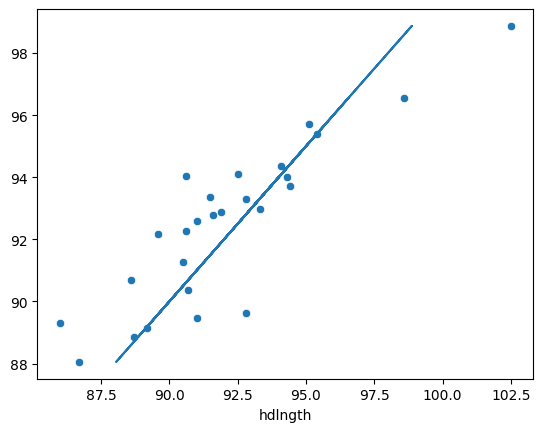

In [79]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_pred, model.predict(X_test_transformed))
plt.show()